# Classification Hyperparameter Optimisation

I'm going to try to find the best value for k in a kNN supervised classification model

In [1]:
# Setup
from matplotlib import pyplot as graph
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

N = 569
Unoptimised Accuracy: 0.9300154120934522 +/- 0.02664811490831884 std
Optimised Accuracy: 0.9300154120934522 +/- 0.02664811490831884 std


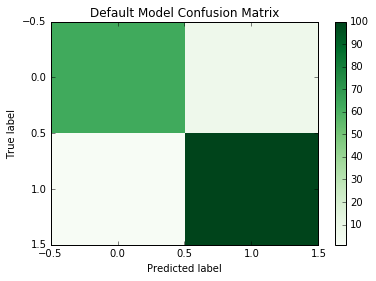

[[ 63   7]
 [  1 100]]


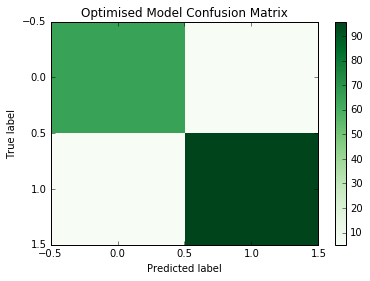

[[65  5]
 [ 5 96]]


In [2]:
# Let's start with a high dimensional example.
breast_dataset = load_breast_cancer()
print('N = {}'.format(len(breast_dataset.target)))

knn_default_model = KNeighborsClassifier()

# Preprocess data
x = StandardScaler().fit_transform(breast_dataset.data)
y = breast_dataset.target

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3)

# Hyperparameters to test
parameters = {'n_neighbors': list(range(1, 20))}
knn_optimised_model = GridSearchCV(KNeighborsClassifier(), parameters)

# Train Both of the Models
knn_default_model.fit(xTrain, yTrain)
knn_optimised_model.fit(xTrain, yTrain)

# Test Both of the Models
score_default_model = cross_val_score(knn_default_model, xTest, yTest)
score_optimised_model = cross_val_score(knn_optimised_model, xTest, yTest)

# Output Results
def printAccuracy(title, score):
    print('{} Accuracy: {} +/- {} std'.format(title, score.mean(), score.std() * 2))
    
def plot_confusion_matrix(cm, title='Model', cmap=graph.cm.Greens):
    graph.imshow(cm, interpolation='nearest', cmap=cmap)
    graph.title(title + ' Confusion Matrix')
    graph.colorbar()
    graph.axis('tight')
    graph.ylabel('True label')
    graph.xlabel('Predicted label')
    graph.show()
    
printAccuracy('Unoptimised', score_default_model)
printAccuracy('Optimised', score_optimised_model)

# Generate Confusion Matrices confusion_matrix(y_test, y_predicted)
default_cm = confusion_matrix(yTest, knn_default_model.predict(xTest))
optimised_cm = confusion_matrix(yTest, knn_optimised_model.predict(xTest))

plot_confusion_matrix(default_cm, title='Default Model')
print(default_cm)

plot_confusion_matrix(optimised_cm, title='Optimised Model')
print(optimised_cm)